In [1]:
cd TileEM/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from BB2TileExact import *
from TileEM_plot_toolbox import *

Populating the interactive namespace from numpy and matplotlib


In [3]:
cd output

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/output


In [14]:
def join_tiles(solutionList,tiles): 
    '''
    Given a solutionList of tile indicies, join the tiles together into a Polygon/MultiPolygon object.
    '''
    try:
        return cascaded_union([tiles[tidx] for tidx in solutionList])
    except:
        #slow version, run through and exclude problematic solutionset item
        Utile=tiles[0]
        problematic_tiles =[]
        for soln in solutionList:
            try:
                Utile=Utile.union(tiles[soln])
            except(shapely.geos.TopologicalError):
                problematic_tiles.append(tiles[soln])
        problematic_tiles.append(Utile)
        return problematic_tiles

In [5]:
def intersection_area(poly1,poly2):
    try:
        return poly1.intersection(poly2).area
    except(shapely.geos.TopologicalError):
        return poly1.buffer(1e-5).intersection(poly2.buffer(1e-5)).area

In [6]:
def PR_compare(objid,sampleNworkers=40):    
    os.chdir("..")
    worker_lst,tiles,indicatorMat= createObjIndicatorMatrix(objid,PRINT=True,sampleNworkers=sampleNworkers,tqdm_on=False,tile_only=False)
    os.chdir(DATA_DIR)
    
    worker_precision_lst,worker_recall_lst = compute_worker_lst_PR_obj(objid,worker_lst)
    best_worker =  np.argmax(worker_recall_lst)
    print "Best worker's PR against BBG: ", max(worker_precision_lst),max(worker_recall_lst)

    approved_tiles = np.where(indicatorMat[best_worker]==1)[0]
    for tidx in approved_tiles:
        plot_coords(tiles[tidx],color="lime")

    bb_objects = bb_info[bb_info["object_id"]==objid]
    bb_objects =  bb_objects[bb_objects.worker_id!=3]
    
    best_worker_id = worker_lst[best_worker]
    worker_bb_info = bb_objects[bb_objects["worker_id"]==best_worker_id]
    worker_BB_polygon = Polygon(zip(*process_raw_locs([worker_bb_info["x_locs"].values[0],worker_bb_info["y_locs"].values[0]])))#.buffer(0)

    plot_coords(worker_BB_polygon,linestyle='--',color='#0000ff')
    
    joined_bb = join_tiles(approved_tiles,tiles)

    if type(joined_bb)==list:
        intersect_area =0
        joined_bb_area =0
        for jbb in joined_bb:
            ia = intersection_area(worker_BB_polygon,jbb)
            intersect_area += ia
            joined_bb_area += jbb.area
    else:
        intersect_area=intersection_area(worker_BB_polygon,joined_bb)
        joined_bb_area =joined_bb.area
    precision = intersect_area/joined_bb_area
    recall = intersect_area/worker_BB_polygon.area
    print precision,recall
    return precision,recall

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (297.93 183.431, 268.723 267.307) and LINESTRING (293.583 195.915, 292.937 197.77) at 293.15174416654747 197.15396547042775
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (407 251.5, 407 251.5) and LINESTRING (407 251.5, 412.667 260) at 406.99999999999574 251.499999999995
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (287.581 239.71, 286.941 240.647) and LINESTRING (286.941 240.647, 287.932 239.373) at 286.94117647058852 240.64705882352902
ERROR:shapely.geos:TopologyException: Input geom 1 is invalid: Self-intersection at or near point 256.14963503649642 283.66423357664229 at 256.14963503649642 283.66423357664229
ERROR:shapely.geos:TopologyException: Input geom 1 is invalid: Self-intersection at or near point 256.14963503649642 283.66423357664229 at 256.14963503649642 283.66423357664229
ERROR:shapely.geos:TopologyException:

Number of non-overlapping tile regions (M) :  463
Number of workers (N) :  10
all unvoted tiles: []
all unvoted workers: []
Object  1
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Best worker's PR against BBG:  0.944169228157 0.986213800212
170

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (216.24 300.02, 216.24 300.02) and LINESTRING (216.24 300.02, 216.24 300.02) at 216.24000000000015 300.01999999999998
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (201.368 306.526, 201.368 306.526) and LINESTRING (201.368 306.526, 197.151 307.37) at 201.36842105263176 306.52631578947364
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (227 297.714, 227 297.714) and LINESTRING (232.8 296.057, 227 297.714) at 226.99999999933331 297.7142857144762
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (226 298, 226.213 297.947) and LINESTRING (226.8 297.8, 226 298) at 226.00032520325246 297.99991869918688
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (401.32 244.432, 401.974 245.636) and LINESTRING (401.812 245.339, 401.787 245.292) at 401.80002056333973 245.


0.987272441449 1.16793519437


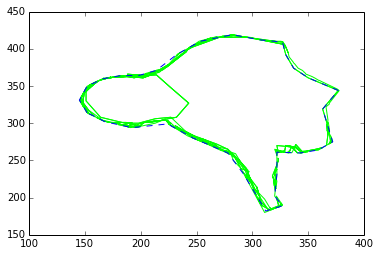

In [59]:
objid=1
p,r=PR_compare(objid,sampleNworkers=10)

ERROR:shapely.geos:TopologyException: Input geom 1 is invalid: Self-intersection at or near point 419.92307692307702 280.30769230769192 at 419.92307692307702 280.30769230769192
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (417.1 273.25, 417.1 273.25) and LINESTRING (417.1 273.25, 417.1 273.25) at 417.09999999999997 273.24999999999983


Number of non-overlapping tile regions (M) :  215
Number of workers (N) :  5
all unvoted tiles: []
all unvoted workers: []
Object  1
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Best worker's PR against BBG:  0.189157868605 0.978750360982
201

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (416 291, 411.556 318.222) and LINESTRING (411.556 318.222, 411.556 318.222) at 411.5555555555556 318.22222222222194
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (299.118 226.941, 293 234) and LINESTRING (296.539 229.916, 293.171 233.803) at 294.95615768511351 231.74289497871516
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (364 201, 364.8 202.8) and LINESTRING (364.8 202.8, 361 199) at 364.80000000000001 202.79999999999993
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (411.556 318.222, 411.556 318.222) and LINESTRING (416 291, 411.556 318.222) at 411.5555555555556 318.22222222222194
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (302.466 208.154, 302.453 208.392) and LINESTRING (302.477 207.943, 302.452 208.419) at 302.45347267640796 208.38401


0.99645298648 0.988198277327


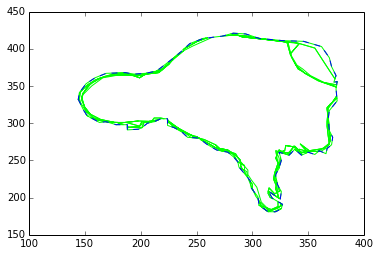

In [61]:
p,r=PR_compare(objid,sampleNworkers=5)

Number of non-overlapping tile regions (M) :  34
Number of workers (N) :  5
all unvoted tiles: []
all unvoted workers: []
Object  15
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
Best worker's PR against BBG:  0.84354217459 1.0
1.0 1.0


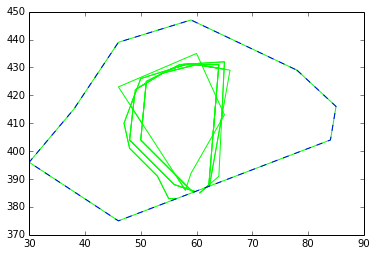

In [10]:
objid=15
p,r=PR_compare(objid,sampleNworkers=5)

### Running Evaluation based on created tile and indMats

In [11]:
def PR_compare(tiles,worker_lst,indicatorMat,objid,sampleNworkers=40,save_png=False):        
    worker_precision_lst,worker_recall_lst = compute_worker_lst_PR_obj(objid,worker_lst)
    best_worker =  np.argmax(worker_recall_lst)
    print "Best worker's PR against BBG: ", max(worker_precision_lst),max(worker_recall_lst)
    plt.figure()
    plt.title("Obj {}".format(objid))
    approved_tiles = np.where(indicatorMat[best_worker]==1)[0]
    for tidx in approved_tiles:
        plot_coords(tiles[tidx],color="lime")

    bb_objects = bb_info[bb_info["object_id"]==objid]
    bb_objects =  bb_objects[bb_objects.worker_id!=3]
    
    best_worker_id = worker_lst[best_worker]
    worker_bb_info = bb_objects[bb_objects["worker_id"]==best_worker_id]
    worker_BB_polygon = Polygon(zip(*process_raw_locs([worker_bb_info["x_locs"].values[0],worker_bb_info["y_locs"].values[0]])))#.buffer(0)

    plot_coords(worker_BB_polygon,linestyle='--',color='#0000ff')
    
    joined_bb = join_tiles(approved_tiles,tiles)

    if type(joined_bb)==list:
        intersect_area =0
        joined_bb_area =0
        for jbb in joined_bb:
            ia = intersection_area(worker_BB_polygon,jbb)
            intersect_area += ia
            joined_bb_area += jbb.area
    else:
        intersect_area=intersection_area(worker_BB_polygon,joined_bb)
        joined_bb_area =joined_bb.area
    precision = intersect_area/joined_bb_area
    recall = intersect_area/worker_BB_polygon.area
    print precision,recall
    if save_png:
        plt.savefig("best_obj{}_PR.png".format())
    return precision,recall

  0%|          | 0/47 [00:00<?, ?it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (302 171, 300.571 174.714) and LINESTRING (300.571 174.714, 300.571 174.714) at 300.57142857142861 174.71428571428564
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (183.182 313.364, 184.429 312.429) and LINESTRING (184.429 312.429, 183 313) at 184.42857142857139 312.42857142857144
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (366.182 205.909, 366.462 206.538) and LINESTRING (366.792 207.64, 366 205) at 366.46153846153845 206.53846153846155
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (366.938 209.688, 366.781 208.905) and LINESTRING (366.538 207.692, 366.938 209.688) at 366.87755552292913 209.38777761464553
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (393 235, 393.909 235.727) and LINESTRING (393.909 23

Best worker's PR against BBG:  0.190053012764 0.992825993557
0.997228640973

  2%|▏         | 1/47 [00:23<18:00,  0.04it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (204.275 297.664, 204.288 297.648) and LINESTRING (204.308 297.692, 204.275 297.664) at 204.27480916037408 297.66412213732059
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (196.823 302.315, 199 300.5) and LINESTRING (196 306, 199 300.5) at 198.99999999999997 300.50000000000006
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (210.385 320.154, 211 320.667) and LINESTRING (211 320.667, 209.571 320.19) at 210.99999999999994 320.66666666666669
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (246 378, 246.077 379) and LINESTRING (246.077 379, 246.077 379) at 246.07692307692307 379
ERROR:shapely.geos:TopologyException: EdgeRing::computePoints: found null Directed Edge
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTR

 1.891859558
Best worker's PR against BBG:  0.955735483468 0.991341708752
0.994423146009

  4%|▍         | 2/47 [00:27<10:15,  0.07it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (49.3103 323.207, 49.3064 323.127) and LINESTRING (49.3064 323.127, 49.3103 323.207) at 49.307501824293922 323.1500364858785
ERROR:shapely.geos:TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 69.333333333333357 327.66666666666669 at 69.333333333333357 327.66666666666669
ERROR:shapely.geos:TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 69.333333333333357 327.66666666666669 at 69.333333333333357 327.66666666666669
ERROR:shapely.geos:TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 69.333333333333357 327.66666666666669 at 69.333333333333357 327.66666666666669
ERROR:shapely.geos:TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 69.333333333333357 327.66666666666669 at 69.333333333333357 327.66666666666669
ERROR:shapely.g

 1.74251470041
Best worker's PR against BBG:  0.980278879831 0.943185336811
0.992141586422

  6%|▋         | 3/47 [00:29<07:11,  0.10it/s]

 1.94308994527
Best worker's PR against BBG: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (88.4286 414.714, 88.1111 417) and LINESTRING (88.2876 415.729, 88.4286 414.714) at 88.371001574077283 415.12878866664357
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (89.2222 409, 88.4286 414.714) and LINESTRING (88.4286 414.714, 89 411) at 88.428571428571487 414.71428571428532
ERROR:shapely.geos:TopologyException: Input geom 0 is invalid: Self-intersection at or near point 86.956521739130423 449.30434782608694 at 86.956521739130423 449.30434782608694
ERROR:shapely.geos:TopologyException: Input geom 0 is invalid: Self-intersection at or near point 86.956521739130423 449.30434782608694 at 86.956521739130423 449.30434782608694
ERROR:shapely.geos:TopologyException: Input geom 0 is invalid: Self-intersection at or near point 86.956521739130423 449.30434782608694 at 86.956521739130423 449.30434782608694
ERROR:shapely.geos:TopologyException: found non-noded intersec

 0.981390012593 0.970056138939
0.993011151088

  9%|▊         | 4/47 [00:32<05:51,  0.12it/s]

 2.76172551093
Best worker's PR against BBG: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (483.846 168.154, 482 167) and LINESTRING (483.846 168.154, 483.143 167.714) at 483.41119613370921 167.88199758356828
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (489.286 208.714, 489.286 208.714) and LINESTRING (489.286 208.714, 489.286 208.714) at 489.28571428571439 208.71428571428578
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (483.313 149.875, 483.313 149.875) and LINESTRING (483.313 149.875, 483.313 149.875) at 483.31250000000017 149.87499999999912
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (482.31 154.552, 482.31 154.552) and LINESTRING (482.31 154.552, 482.31 154.552) at 482.31034482758616 154.55172413793116
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (443 185.154, 440.066 188.539) and LINESTRING (440.2 187.6, 440.019 188.868) a

 0.990837224185 0.950324076004
0.993834969111

 11%|█         | 5/47 [00:34<04:48,  0.15it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (510.85 211.5, 510.89 211.901) and LINESTRING (510.85 211.5, 510.85 211.5) at 510.84999811649732 211.49998116497108
ERROR:shapely.geos:TopologyException: no outgoing dirEdge found at 497.80000000000001 250.09999999999999
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (510.85 211.5, 510.89 211.901) and LINESTRING (510.85 211.5, 510.85 211.5) at 510.84999811649732 211.49998116497108
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (500.5 207.5, 500.5 207.5) and LINESTRING (499.968 209.806, 500.5 207.5) at 500.5000091552734 207.4999603271485
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (500.788 207.455, 500.554 208.508) and LINESTRING (500.601 208.297, 500.788 207.455) at 500.63185822987583 208.15663796555862
ERROR:shapely.geos:TopologyExceptio

 0.997083657597
Best worker's PR against BBG:  0.956598457558 0.948290957992
0.982041518467

 13%|█▎        | 6/47 [00:35<04:02,  0.17it/s]

 0.958923257487
Best worker's PR against BBG: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (366.171 178.057, 366.162 177.938) and LINESTRING (366 176, 366.171 178.05) at 366.16187087616163 177.94245051393978
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (419.2 177.4, 419.2 177.4) and LINESTRING (419.2 177.4, 418.783 176.043) at 419.19999999999987 177.39999999999964
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (364.857 175.571, 362.045 167.136) and LINESTRING (363.862 172.587, 364.532 174.596) at 364.48690187258626 174.46070561775886
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (363.862 172.587, 364.857 175.571) and LINESTRING (364.857 175.571, 364.857 175.571) at 364.85714285714289 175.5714285714287
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (366.171 178.057, 366.014 176.171) and LINESTRING (366.171 178.05, 366.014 176.171) at 3

 0.923918831924 0.974135869084
0.971195853045

 15%|█▍        | 7/47 [00:36<03:29,  0.19it/s]

 0.998627560077
Best worker's PR against BBG: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (380.761 134.226, 379.429 135.114) and LINESTRING (379.429 135.114, 380.781 134.213) at 380.37585871340576 134.48276243684893
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (492 150.5, 492.3 152.45) and LINESTRING (492.3 152.45, 491.889 149.778) at 492.23914628914628 152.05445087945091
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (492 156, 494.545 158.909) and LINESTRING (494.545 158.909, 494.308 158.615) at 494.54545454545462 158.90909090909096
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (113.376 249.611, 112.323 252.484) and LINESTRING (112.323 252.484, 112.323 252.484) at 112.32258064516131 252.48387096774192
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (478.75 136.5, 482.737 139.158) and LINESTRING (481 136, 482.737 139.158) at 482.73684

 0.954158717771 0.989920558258
0.976119567221

 17%|█▋        | 8/47 [00:50<04:07,  0.16it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (373 218, 375.592 222.896) and LINESTRING (375.592 222.896, 357 197) at 375.59199999999987 222.89599999999976
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (383.765 273.443, 383.842 273.789) and LINESTRING (384.571 277.071, 383.765 273.443) at 383.76518677646504 273.44334049409275
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (375.592 222.896, 375.484 222.692) and LINESTRING (375.086 221.94, 375.592 222.896) at 375.55064048811715 222.81787647755471
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (295.305 279.345, 296.118 280.471) and LINESTRING (296.118 280.471, 296.118 280.471) at 296.11764705882348 280.47058823529409
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (285.649 272.108, 280.286 271.214) an

 1.08306403073
Best worker's PR against BBG:  0.999002583262 0.974452641021
0.996830222044

 19%|█▉        | 9/47 [00:55<03:55,  0.16it/s]

 1.02900193082
Best worker's PR against BBG: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (553.228 324.624, 555.778 323.222) and LINESTRING (555.778 323.222, 554 325) at 555.7777777777776 323.2222222222224
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (545.947 330.474, 545.947 330.474) and LINESTRING (543.5 332.571, 545.947 330.474) at 545.94736842105249 330.47368421052636
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (488 337, 491.867 334.1) and LINESTRING (491 335, 488 337) at 488.00000000000034 336.99999999999977
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (464.794 223.46, 465.637 223.623) and LINESTRING (459.517 223.49, 465.637 223.623) at 465.63725490196066 223.62254901960785
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (538.453 267.2, 537.757 273.811) and LINESTRING (538 271.5, 538 273) at 538 271.50000000000011
ERROR:shape

 0.978654432754 0.986139456538
0.992450884535

 21%|██▏       | 10/47 [01:03<03:55,  0.16it/s]

 3.67173195127
Best worker's PR against BBG: 

ERROR:shapely.geos:TopologyException: Input geom 0 is invalid: Self-intersection at or near point 353.32710280373828 282.72897196261681 at 353.32710280373828 282.72897196261681
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (411.457 333.717, 416.045 335.607) and LINESTRING (414.879 334.69, 416.045 335.607) at 416.0449438202246 335.60674157303362
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (411.457 333.717, 411.457 333.717) and LINESTRING (411.457 333.717, 411.457 333.717) at 411.45652173913055 333.71739130434781
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (411.457 333.717, 411.457 333.717) and LINESTRING (411.457 333.717, 411.457 333.717) at 411.45652173913055 333.71739130434781
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (411.457 333.717, 411.457 333.717) and LINESTRING (411.457 333.717, 411.457 333.717) at 411.45652173913

 0.927925613397 0.96684726903
0.982275917057

 23%|██▎       | 11/47 [01:21<04:25,  0.14it/s]

 1.98977380741
Best worker's PR against BBG: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (361.385 373.846, 361.385 373.846) and LINESTRING (361.385 373.846, 361.385 373.846) at 361.38461538461547 373.84615384615392
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (347.696 388.554, 345.571 385.143) and LINESTRING (347.604 388.407, 347.699 388.559) at 347.69414638879459 388.55116462426167
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (343 348, 343.5 348.667) and LINESTRING (343.5 348.667, 340.5 344) at 343.49999999999972 348.66666666666629
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (385 437.5, 385.786 437.75) and LINESTRING (385.737 437.684, 385 437.5) at 385.00000000000057 437.50000000000011
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (377.752 433.451, 377.75 433.45) and LINESTRING (377.75 433.45, 377.752 433.451) at 377.750000000

 0.973312843473 0.989076279424
0.995446014413

 26%|██▌       | 12/47 [01:28<04:16,  0.14it/s]

 1.75154524122
Best worker's PR against BBG: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (233.968 286.34, 228.5 292.522) and LINESTRING (228.5 292.522, 231.989 288.578) at 230.91850848914669 289.78777301226899
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (215.156 386.344, 215.361 386.795) and LINESTRING (216.014 387.398, 215.361 386.795) at 215.36144578313252 386.79518072289153
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (262.161 400.195, 257.667 399.667) and LINESTRING (257.667 399.667, 257.667 399.667) at 257.66666666666686 399.66666666666669
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (301.169 290.231, 305 303) and LINESTRING (301.724 295.083, 301.169 290.231) at 301.16923076923081 290.23076923076945
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (257.667 399.667, 262.161 400.195) and LINESTRING (260.268 399.973, 262.161 400

 0.97901640292 0.978969123406
0.994574770927

 28%|██▊       | 13/47 [01:32<04:00,  0.14it/s]

 2.74907827586
Best worker's PR against BBG: 

ERROR:shapely.geos:TopologyException: side location conflict at 479.21341463414632 200.8109756097561
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (563.095 330.667, 562.935 331.226) and LINESTRING (562.935 331.226, 563.095 330.667) at 563.01533047236489 330.94634334672287
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (412.727 260.5, 413 261) and LINESTRING (413 261, 412.667 260.333) at 412.99999999999994 260.99999999999989
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (441.933 296.2, 441.5 291) and LINESTRING (441.805 294.664, 441.5 291) at 441.55363802647167 291.64365631765986
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (471.909 205.545, 471.909 205.545) and LINESTRING (471.909 205.545, 470.732 206.854) at 471.90909090909042 205.54545454545507
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRI

 0.952023765981 0.991568644184
0.995389463275

 30%|██▉       | 14/47 [01:40<03:56,  0.14it/s]

 0.973622486824
Best worker's PR against BBG:  0.94154476747 1.0
0.9900491112

 32%|███▏      | 15/47 [01:40<03:35,  0.15it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (386.038 372.386, 385.918 372.402) and LINESTRING (389 372, 385.791 372.419) at 385.91782052033091 372.40202341039162
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (370.084 374.467, 370.084 374.467) and LINESTRING (365.571 378.286, 370.084 374.467) at 370.08411214953281 374.46728971962614
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (367.851 377.627, 365.511 380.487) and LINESTRING (361.346 385.577, 366.879 378.815) at 366.74504570788611 378.9782774681392
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (362.519 382.911, 362.114 383.831) and LINESTRING (362.266 383.487, 363.048 381.709) at 362.33085111445945 383.33897473986497
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (360.739 386.957, 360.739 38

 0.953485182092
Best worker's PR against BBG:  0.996257177416 0.995114722208
0.996055871049

 34%|███▍      | 16/47 [01:42<03:18,  0.16it/s]

 1.05259952822
Best worker's PR against BBG: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (188.85 167.975, 185 165.5) and LINESTRING (185 165.5, 191.884 168.942) at 185.00000000000006 165.50000000000003
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (97.75 171.125, 97.0558 171.472) and LINESTRING (95.8158 172.645, 97.75 171.125) at 97.749999999999943 171.12500000000003
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (159.091 145.455, 158.888 145.432) and LINESTRING (158.414 145.379, 159.091 145.455) at 158.9943565445887 145.44381739384318
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (105.769 164.846, 105.769 164.846) and LINESTRING (105.769 164.846, 106.081 164.604) at 105.76923076923079 164.84615384615384
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (158.414 145.379, 159.091 145.455) and LINESTRING (159.091 145.455, 158.414 145.379)

 0.946851384528 0.974907478777
0.978796005347

 36%|███▌      | 17/47 [01:44<03:04,  0.16it/s]

 0.924324793408
Best worker's PR against BBG:  1.0 0.994172162696
0.999158735162

 38%|███▊      | 18/47 [01:44<02:49,  0.17it/s]

 0.999930248913
Best worker's PR against BBG: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (67.2915 293.287, 67.3684 295.211) and LINESTRING (67.3 293.5, 67 298) at 67.299999999999997 293.50000000000011
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (105.079 358.901, 105.309 358.846) and LINESTRING (105.75 358.062, 105.079 358.901) at 105.07920792079211 358.9009900990099
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (112.692 342.077, 113 343) and LINESTRING (112.75 342.25, 113 344) at 112.75 342.25
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (112.4 346.6, 112.517 345.897) and LINESTRING (112.524 346.061, 112.511 345.747) at 112.51724137931035 345.89655172413791
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (77.688 260.197, 78.5359 259.871) and LINESTRING (78.3743 259.933, 78.1835 260.006) at 78.336738982183576 259.94740808377554
ERR

 0.972719312404 0.980229913156
0.97935435297

 40%|████      | 19/47 [01:48<02:39,  0.18it/s]

 0.9987918391
Best worker's PR against BBG:  0.999398468143 0.984356346262
0.97173991432

 43%|████▎     | 20/47 [01:48<02:26,  0.18it/s]

 0.932366650749
Best worker's PR against BBG: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (292.796 111.078, 292.874 111.073) and LINESTRING (287.111 111.444, 293.097 111.058) at 292.86753329981758 111.07306236775369
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (283.277 111.205, 244.754 108.797) and LINESTRING (294.034 109.029, 257.143 109.571) at 257.14285714285722 109.57142857142857
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (284.609 109.168, 257.143 109.571) and LINESTRING (257.143 109.571, 284.651 109.167) at 284.52587645709878 109.16873711092502


 1.0 0.988848435682
0.979599202191

 45%|████▍     | 21/47 [01:49<02:15,  0.19it/s]ERROR:shapely.geos:TopologyException: Input geom 0 is invalid: Self-intersection at or near point 394.67768595041321 124.86776859504133 at 394.67768595041321 124.86776859504133
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (382.219 177.248, 380.655 177.127) and LINESTRING (380.534 177.118, 382.125 177.24) at 381.07320806867779 177.15947754374446
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (375.787 124.967, 372 126) and LINESTRING (374.2 125.4, 375.511 125.213) at 374.19999999999999 125.40000000000001
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (370.471 149.076, 370.138 132.759) and LINESTRING (370 148, 370.319 141.623) at 370.31884057971013 141.62318840579732
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (397.742 163.053, 397.787 165.497) and LINESTRING (397.737 162.813, 397.787

 1.73546899784
Best worker's PR against BBG:  0.97517395716 0.99914083735
0.96839810876

 47%|████▋     | 22/47 [01:50<02:05,  0.20it/s]

 0.994563681817
Best worker's PR against BBG: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (400.315 240.988, 400.315 240.988) and LINESTRING (400.315 240.988, 400.315 240.988) at 400.31474103585657 240.988047808765
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (423 183, 416.381 201.653) and LINESTRING (414.894 205.295, 447.002 126.685) at 416.3813559322038 201.65254237288033
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (514.273 206.636, 514.176 207.12) and LINESTRING (514.273 206.636, 514.176 207.12) at 514.25659371492702 206.71703142536504
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (525.364 188.332, 525.324 188.382) and LINESTRING (525.324 188.382, 525.36 188.338) at 525.35211170325226 188.34741902935841
ERROR:shapely.geos:TopologyException: Directed Edge visited twice during ring-building at 429.18181818181824 285.72727272727275
ERROR:shapely.geos:TopologyException: 

 0.979652460347 0.993984851102
0.991608402514

 49%|████▉     | 23/47 [01:53<01:58,  0.20it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (381 258, 380.689 256.889) and LINESTRING (383 264, 380.689 256.889) at 380.68888891060925 256.88888895572086
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (408.53 358.121, 390.229 362.844) and LINESTRING (390.229 362.844, 405.006 360.605) at 390.22935779816527 362.8440366972477
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (377.5 247.75, 377.068 245.805) and LINESTRING (377.5 247.75, 377.068 245.805) at 377.5 247.75
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (360.331 224.288, 358.625 224.676) and LINESTRING (358.625 224.676, 358.625 224.676) at 358.62511111116203 224.67611111109954
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (408.329 358.173, 390.229 362.844) and LINESTRING (390.229 362.844, 

 1.77768793545
Best worker's PR against BBG:  0.979029326626 0.996186146176
0.995775836928

 51%|█████     | 24/47 [01:59<01:54,  0.20it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (454.312 357.231, 415.333 381.444) and LINESTRING (454.312 357.231, 454.312 357.231) at 454.31186440677908 357.2305084745766
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (508.051 488.034, 508.051 488.034) and LINESTRING (533 474, 508.051 488.034) at 508.05084745762713 488.03389830508473
ERROR:shapely.geos:TopologyException: no outgoing dirEdge found at 551 296
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (434.8 544.76, 434.8 544.76) and LINESTRING (434.8 544.76, 434.8 544.76) at 434.79999999999865 544.75999999999976
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (434.8 544.76, 434.8 544.76) and LINESTRING (434.8 544.76, 434.8 544.76) at 434.79999999999865 544.75999999999976
ERROR:shapely.geos:TopologyException: found non-noded intersect

 1.81426482396
Best worker's PR against BBG:  0.965222388545 0.96984696538
0.988563950023

 53%|█████▎    | 25/47 [02:01<01:46,  0.21it/s]

 1.12628320733
Best worker's PR against BBG: 

ERROR:shapely.geos:TopologyException: no outgoing dirEdge found at 115.36585365838276 365.56097560925264
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (92.6933 297.718, 88.9459 288.162) and LINESTRING (88.9459 288.162, 93 301) at 88.945945945945979 288.1621621621623
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (34.8286 319.08, 35.2222 319.815) and LINESTRING (34.8286 319.08, 35.2299 319.829) at 35.203371846841925 319.77962744743837
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (87.7 267.7, 88 267.4) and LINESTRING (88 267.4, 88 267.4) at 87.999996679335766 267.40000332066421
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (22.2 294.4, 22.2252 294.445) and LINESTRING (21 294.2, 22.2252 294.445) at 22.225225225225238 294.44504504504505
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (103 324, 1

 0.987454662407 0.976675090905
0.991386247709

 55%|█████▌    | 26/47 [02:03<01:40,  0.21it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (195.842 637.193, 195.842 637.193) and LINESTRING (230 637, 195.842 637.193) at 195.84210526316335 637.19298245614038
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (148.308 637.462, 125.899 637.588) and LINESTRING (148.308 637.462, 137 638) at 148.30769230759466 637.46153846154311
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (170.55 637.336, 134.537 637.539) and LINESTRING (125.899 637.588, 148.308 637.462) at 141.53750637436036 637.49978809958384
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (170.55 637.336, 148.308 637.462) and LINESTRING (148.308 637.462, 148.308 637.462) at 148.30769230759526 637.46153846154311
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (48.4246 489.333, 50.4132 486.208) an

 0.985949134627
Best worker's PR against BBG:  0.975453201648 0.999469612716
0.771632351656

 57%|█████▋    | 27/47 [02:04<01:32,  0.22it/s]

 1.91337234101
Best worker's PR against BBG: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (362.216 53.9897, 362.216 53.9897) and LINESTRING (362.35 53.7978, 362.216 53.9897) at 362.21649484536084 53.989690721649474
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (362.216 53.9897, 362.462 53.6385) and LINESTRING (362.216 53.9897, 362.466 53.6326) at 362.4352856225043 53.67609060774388
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (265.274 75.3613, 265.97 74.2475) and LINESTRING (266.269 73.7692, 264.818 76.0909) at 265.78641668074994 74.541733310800097
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (389.574 101.32, 391.042 97.7542) and LINESTRING (391.042 97.7542, 390.857 97.8571) at 391.04237288135596 97.754237288135599
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (387.571 102.238, 387.571 102.238) and LINESTRING (387.571 102.238, 389

 0.953792059371 0.997547752406
1.00047472447

 60%|█████▉    | 28/47 [02:23<01:37,  0.20it/s]

 1.02376940857
Best worker's PR against BBG: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (556.25 72.5, 556.25 72.5) and LINESTRING (554.5 74.6, 556.25 72.5) at 556.25000000033367 72.499999999696627
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (582 91, 576.706 95.5882) and LINESTRING (581.49 91.4422, 585 97) at 581.48979591836735 91.442176870748298
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (558.178 88.2603, 558.173 88.3654) and LINESTRING (558.173 88.3654, 558.962 85.4721) at 558.17307692307691 88.365384615384656
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (538.036 75.2268, 530.75 84.5) and LINESTRING (533.523 80.9705, 539 74) at 536.36299622114336 77.356186627635637
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (478.5 141.5, 478.653 143.489) and LINESTRING (478.653 143.489, 478.646 143.4) at 478.64735143932211 143.4155687111

 0.914091364446 0.998965707683
0.973885364502

 62%|██████▏   | 29/47 [02:47<01:43,  0.17it/s]

 0.312751335103
Best worker's PR against BBG: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (85.1818 68.8182, 85.6489 67.617) and LINESTRING (85.6756 67.1907, 85 78) at 85.648936170212764 67.61702127659575
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (39.1667 82.3889, 42.5 82.1667) and LINESTRING (42.5 82.1667, 42.5 82.1667) at 42.499999999925016 82.166666666674999
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (27.451 96.7451, 29.4296 97.4741) and LINESTRING (29.2466 97.4658, 29.4296 97.4741) at 29.429629629621328 97.474074074073698
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (27.451 96.7451, 27.451 96.7451) and LINESTRING (27.451 96.7451, 27.451 96.7451) at 27.450972549046071 96.745097254904607
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (85.8806 144.654, 93.2896 151.357) and LINESTRING (88.4618 146.989, 85.0344 143.888) at 86.0

 0.850582140485 0.994602705259
1.00179142802

 64%|██████▍   | 30/47 [03:14<01:50,  0.15it/s]

 0.888463873091
Best worker's PR against BBG: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (59.1111 176.303, 55.9024 179.366) and LINESTRING (57.3333 178, 54.4715 180.732) at 56.815417372596663 178.49437432615773
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (138.205 242.968, 138.041 244.061) and LINESTRING (137 251, 138.225 242.831) at 138.20256883557306 242.98287442951295
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (75.8352 135.824, 78.7442 135.116) and LINESTRING (75.8352 135.824, 78.7442 135.116) at 78.427541012523108 135.19330083479167
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (155.076 316.913, 157.452 322.415) and LINESTRING (157.452 322.415, 158.03 325.603) at 157.45203679369249 322.41524310118257
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (116.76 177.36, 119 181) and LINESTRING (119.535 181.202, 116.76 177.36) at 116

 0.980299993322 0.97748185791
0.988724685616

 66%|██████▌   | 31/47 [03:36<01:51,  0.14it/s]

 1.8773750249
Best worker's PR against BBG: 

ERROR:shapely.geos:TopologyException: side location conflict at 257.76923076923077 164.46153846153842
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (258.359 386.074, 258.726 386.077) and LINESTRING (258.726 386.077, 257.458 386.066) at 258.69984897216841 386.07698981391303
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (364 155.5, 364 155.5) and LINESTRING (364 155.5, 360.356 142.747) at 363.99999999999994 155.49999999999994
ERROR:shapely.geos:TopologyException: side location conflict at 229.08108108108109 223.75675675675674
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (387.73 303.757, 387.474 305.421) and LINESTRING (387.474 305.421, 388 302) at 387.60202620000643 304.586829699958
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (258.332 386.035, 258.191 385.831) and LINESTRING (258.002 385.559, 258.359 386.074) at 258.19467552123

 0.991407714541 0.986689658781
0.912117611165

 68%|██████▊   | 32/47 [03:51<01:48,  0.14it/s]

 2.83083661389
Best worker's PR against BBG: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (418.899 282.483, 418.899 282.483) and LINESTRING (418.899 282.483, 418.899 282.483) at 418.89887640449439 282.48314606741587
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (424 309, 423.742 307.043) and LINESTRING (423.81 307.557, 423.497 305.174) at 423.7713710305573 307.26241983223548
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (602.595 263.91, 602.595 263.91) and LINESTRING (602.595 263.91, 602.595 263.91) at 602.59459459477557 263.90990991024745
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (569.219 214.32, 569.324 214.432) and LINESTRING (569.219 214.32, 569.75 215) at 569.21862348178149 214.31983805668034
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (603.757 268.949, 603.548 268.041) and LINESTRING (603.548 268.041, 603.618 268.343) at

 0.97926068494 0.996005557051
0.991394391193

 70%|███████   | 33/47 [03:57<01:40,  0.14it/s]

 2.76371492291
Best worker's PR against BBG: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (298.686 102.686, 298.333 102.333) and LINESTRING (298.714 102.657, 298.333 102.333) at 298.33333333333354 102.33333333333351
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (331.052 321.279, 326.783 325.882) and LINESTRING (326.783 325.882, 331.052 321.279) at 327.70364720363074 324.8889246137723
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (331.531 320.762, 326.783 325.882) and LINESTRING (326.783 325.882, 331.531 320.762) at 327.63724066496559 324.96052622178883
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (316.805 224.897, 316.805 224.897) and LINESTRING (316 208, 316.805 224.897) at 316.80459770114942 224.89655172413794
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (207.855 251.309, 207.531 251.996) and LINESTRING (207.757 251.516, 207.855

 0.993635293917 0.98528563317
0.982367667893

 72%|███████▏  | 34/47 [04:34<01:44,  0.12it/s]

 0.273186907398
Best worker's PR against BBG: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (293.286 98.2857, 293.286 98.2857) and LINESTRING (301.5 106.5, 293.286 98.2857) at 293.28571428571433 98.285714285714334
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (2.99265 637, 2.65452 545.029) and LINESTRING (2.70311 558.246, 1 558.091) at 2.703109327983952 558.24573721163495
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (217.21 393.355, 215.024 395.341) and LINESTRING (217.21 393.355, 215.024 395.341) at 217.05314701774233 393.49713907477968
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (215.024 395.341, 215.024 395.341) and LINESTRING (215.024 395.341, 215.024 395.341) at 215.02439024390253 395.34146341463401
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (279.413 357.208, 279 357.667) and LINESTRING (278.941 357.733, 280.235 356.294) at

 0.364205881224 0.998781263768
0.999411953613

 74%|███████▍  | 35/47 [04:41<01:36,  0.12it/s]

 1.56029775127
Best worker's PR against BBG: 

ERROR:shapely.geos:TopologyException: Input geom 1 is invalid: Self-intersection at or near point 3.6396396396396402 40.279279279279272 at 3.6396396396396402 40.279279279279272
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (2 197, 1.9944 196.082) and LINESTRING (3 197.636, 1.9944 196.082) at 1.994404029099049 196.08226077224404
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (137.824 408.745, 131.015 397.741) and LINESTRING (131.015 397.741, 144 417) at 131.01450511945538 397.74061433447315
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (9.25229 51.5041, 13.6983 59.4348) and LINESTRING (13.6983 59.4348, 9.25 51.5) at 10.919826130762935 54.478608773793347
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (25.8315 232.921, 25.8315 232.921) and LINESTRING (25.8315 232.921, 99 346) at 25.831460674145628 232.9213483145887
ERROR:shapely.geos

 0.987061627325 0.959602420445
0.993699138761

 77%|███████▋  | 36/47 [04:43<01:26,  0.13it/s]

 1.89221609341
Best worker's PR against BBG: 

ERROR:shapely.geos:TopologyException: side location conflict at 556.50113895216407 292.88382687927128
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (520 220.8, 517.923 216.231) and LINESTRING (517.923 216.231, 517.923 216.231) at 517.92307692307691 216.2307692307692
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (563.938 244.346, 565 247) and LINESTRING (563.938 244.346, 563.967 244.186) at 563.93846153846152 244.34615384615384
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (552.958 295.337, 552.958 295.337) and LINESTRING (552.948 295.343, 552.958 295.337) at 552.95789473684215 295.33684210526314
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (493.107 268.278, 493.207 269.486) and LINESTRING (493.207 269.486, 493.107 268.278) at 493.13168533198188 268.58022398378284
ERROR:shapely.geos:TopologyException: found non-noded intersectio

 0.960636424478 0.99114444876
0.999742538864

 79%|███████▊  | 37/47 [04:55<01:19,  0.13it/s]

 1.60615116566
Best worker's PR against BBG: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (492.319 267.255, 492.319 267.255) and LINESTRING (492.319 267.255, 492.319 267.255) at 492.31914893624315 267.25531914762291
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (453.776 161.02, 450.049 153.981) and LINESTRING (449.524 153.69, 451.361 154.708) at 450.04865556978234 153.98079385403332
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (490.1 279.683, 490.1 279.683) and LINESTRING (490.1 279.683, 490.1 279.683) at 490.09958506224069 279.68257261410787
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (485.719 318.207, 485.64 318.215) and LINESTRING (485.66 318.213, 485.719 318.207) at 485.67175726724332 318.21165843025062
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (293.974 144.744, 293.963 146.936) and LINESTRING (293.963 146.936, 294 140.04

 0.992227798723 0.987765896321
0.995236580903

 81%|████████  | 38/47 [04:59<01:10,  0.13it/s]

 1.87159927796
Best worker's PR against BBG: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (2.51391 294.879, 2.99884 377.801) and LINESTRING (3 374, 2.93143 366.274) at 2.9314285714285719 366.27428571428578
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (50.4857 364.914, 50.4857 364.914) and LINESTRING (50.4857 364.914, 50.3263 363.958) at 50.485714285714302 364.91428571428571
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (290.201 239.844, 281.929 86.3555) and LINESTRING (280.323 72.2769, 287.4 187.867) at 287.39999999999986 187.86666666666451
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (279.027 67.7522, 287.674 312.749) and LINESTRING (287.674 312.749, 279.027 67.7522) at 279.02654867256638 67.752212389380475
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (39.8 34.8, 39.4 34.9714) and LINESTRING (39.4 34.9714, 53 34) at 39.400000000

 0.990030636785 0.992067467506
0.996772926127

 83%|████████▎ | 39/47 [05:09<01:03,  0.13it/s]

 1.00872927718
Best worker's PR against BBG:  0.969951783684 1.0
1.0

 85%|████████▌ | 40/47 [05:10<00:54,  0.13it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (272.563 552.696, 272.527 552.018) and LINESTRING (272.527 552.018, 272.89 558.906) at 272.53095345607943 552.0881156655098
ERROR:shapely.geos:TopologyException: Input geom 0 is invalid: Self-intersection at or near point 291.2658227848101 544.98734177215181 at 291.2658227848101 544.98734177215181
ERROR:shapely.geos:TopologyException: Input geom 0 is invalid: Self-intersection at or near point 291.2658227848101 544.98734177215181 at 291.2658227848101 544.98734177215181
ERROR:shapely.geos:TopologyException: Input geom 0 is invalid: Self-intersection at or near point 291.2658227848101 544.98734177215181 at 291.2658227848101 544.98734177215181
ERROR:shapely.geos:TopologyException: Input geom 0 is invalid: Self-intersection at or near point 291.2658227848101 544.98734177215181 at 291.2658227848101 544.98734177215181
ERROR:shapely.geos:TopologyException: Input

 0.999776814486
Best worker's PR against BBG:  0.841851483493 1.0
0.984887687969

 87%|████████▋ | 41/47 [05:11<00:45,  0.13it/s]

 1.85801879919
Best worker's PR against BBG: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (157.769 462.324, 157.769 462.324) and LINESTRING (158.003 462.422, 157.769 462.324) at 157.76878612716769 462.32369942196539
ERROR:shapely.geos:TopologyException: side location conflict at 127.64657253751371 491.25553508866875
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (229.024 488.843, 231.314 488.964) and LINESTRING (231.314 488.964, 229.024 488.843) at 230.48260352664778 488.92013702771828
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (227.615 520.564, 227.286 520.857) and LINESTRING (227.286 520.857, 235 514) at 227.60979041120171 520.56907519004289
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (233 508, 227.615 520.564) and LINESTRING (227.615 520.564, 235 514) at 227.61538461538464 520.56410256410254
ERROR:shapely.geos:TopologyException: found non-noded intersection between

 1.0 0.928517279158
0.997369458397

 89%|████████▉ | 42/47 [05:15<00:37,  0.13it/s]

 1.69484470326
Best worker's PR against BBG: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (207.6 305.4, 206.4 303.6) and LINESTRING (207.333 305, 202.793 302.276) at 207.33333333333331 305
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (171.632 310.465, 179.895 303.474) and LINESTRING (180.171 303.105, 179.895 303.474) at 179.89473684210523 303.47368421052636
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (106.753 438.513, 110.4 441) and LINESTRING (110.4 441, 107.517 439.034) at 109.10437814800466 440.11662146454864
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (110.4 441, 115.377 444.393) and LINESTRING (114.529 443.815, 110.4 441) at 111.76251504012477 441.92898752735778
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (196.144 473.03, 197.113 473.075) and LINESTRING (198.648 472.992, 197.113 473.075) at 197.11250000000024 473.0749999

 0.973176590921 0.955524897277
0.99730257407

 91%|█████████▏| 43/47 [05:24<00:30,  0.13it/s]

 1.87025269597
Best worker's PR against BBG: 

ERROR:shapely.geos:TopologyException: Input geom 1 is invalid: Self-intersection at or near point 236.01379310344828 304.7448275862069 at 236.01379310344828 304.7448275862069
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (218.042 327.042, 218.562 325.062) and LINESTRING (218.116 326.76, 216.364 322.818) at 218.11570247933884 326.76033057851242
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (289.684 326.852, 289.862 327.248) and LINESTRING (289.048 325.44, 290.113 327.806) at 289.74375750799027 326.986127795534
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (231 383, 231 384.667) and LINESTRING (231.241 386.434, 230.672 382.262) at 231 384.66666666666657
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (291.765 331.662, 291.608 331.381) and LINESTRING (291.333 330.667, 292.134 332.747) at 291.60824742268051 331.38144329896932
ERROR:sh

 0.967303420486 0.979651135897
0.988871469937

 94%|█████████▎| 44/47 [06:31<00:26,  0.11it/s]

 1.87577808936
Best worker's PR against BBG: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (52.0563 142.341, 52.2667 142.232) and LINESTRING (52.2667 142.232, 52.2667 142.232) at 52.266666666666659 142.23209876543211
ERROR:shapely.geos:TopologyException: side location conflict at 106.36744467271537 155.97676059083966
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (52.2936 142.233, 52.9603 142.258) and LINESTRING (52.4362 142.238, 53.1053 142.263) at 52.944743027635226 142.25721270472724
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (45.5179 173.339, 45.5179 173.339) and LINESTRING (45.5179 173.339, 45.5215 173.105) at 45.517857142857139 173.33928571428572
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (101.105 205.068, 58.3514 206.595) and LINESTRING (64 206, 58.3514 206.595) at 58.351351351351397 206.59459459459458
ERROR:shapely.geos:TopologyException: found non-noded inter

 0.999828254118 0.974801026442
0.997798101031

 96%|█████████▌| 45/47 [06:33<00:17,  0.11it/s]

 1.1230064406
Best worker's PR against BBG: 

ERROR:shapely.geos:TopologyException: Input geom 0 is invalid: Self-intersection at or near point 161.63636365227276 332.27272727954551 at 161.63636365227276 332.27272727954551
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (152 362, 154.189 361.514) and LINESTRING (153.385 361.692, 149 363.571) at 153.38461538461542 361.69230769230768
ERROR:shapely.geos:TopologyException: side location conflict at 147 308
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (103.778 433, 105.905 430.265) and LINESTRING (105.682 430.552, 105.839 430.35) at 105.80427566162734 430.39450272076482
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (96.4 330.6, 101.636 327.545) and LINESTRING (101.636 327.545, 98.2857 329.5) at 100.37762237762232 328.27972027972032
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (154.391 361.261, 153.385 361.692) and LINESTRING (15

 0.959520429762 0.968364430391
0.923341175833

 98%|█████████▊| 46/47 [06:39<00:08,  0.12it/s]ERROR:shapely.geos:TopologyException: Input geom 0 is invalid: Self-intersection at or near point 168 136.19999999999999 at 168 136.19999999999999
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (202.529 178.294, 195.6 177.2) and LINESTRING (196.572 177.275, 195.6 177.2) at 195.60000000000016 177.19999999999999
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (171 174, 173.168 174.526) and LINESTRING (172 174, 171.967 174.234) at 171.96652719665272 174.23430962343096
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (210.471 140.765, 208.273 160.545) and LINESTRING (208.273 160.545, 209.143 152.714) at 208.81869566008223 155.6317390592599
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (179.606 124.939, 179.606 124.939) and LINESTRING (178.913 124.833, 179.606 124.939) at 179.60606060606062 12

 0.974437628412
Best worker's PR against BBG:  0.989379635406 0.991618113381
0.971068428573

 1.00829996506


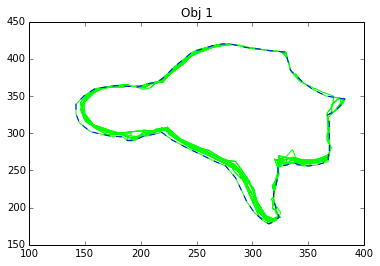

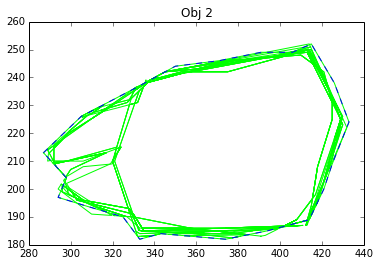

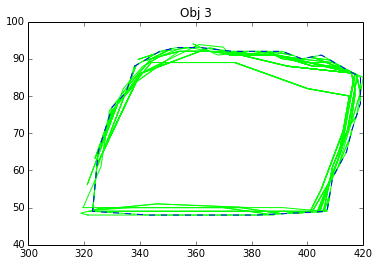

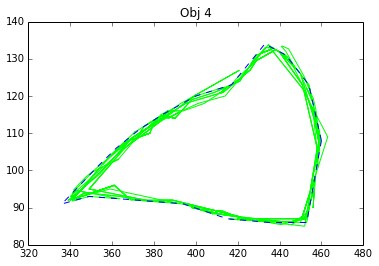

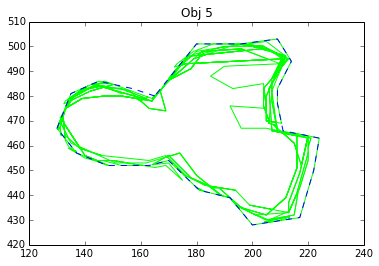

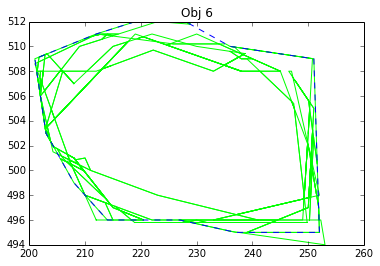

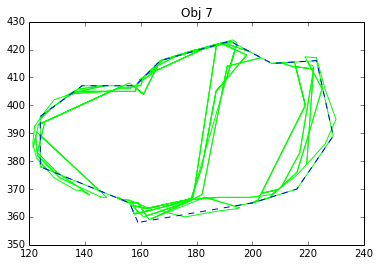

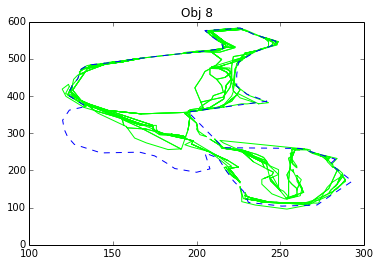

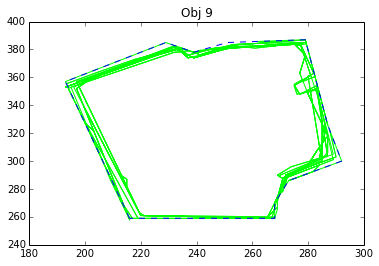

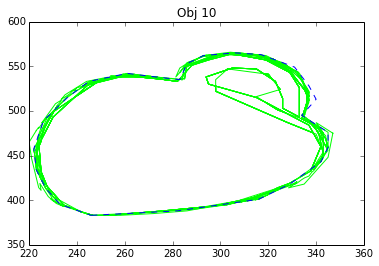

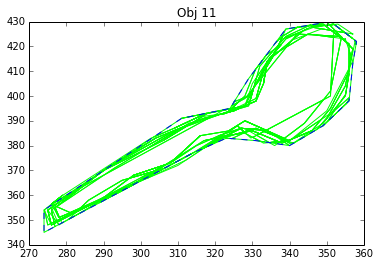

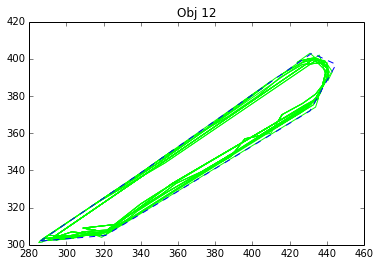

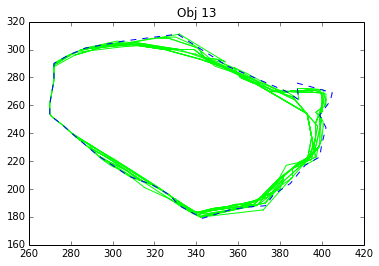

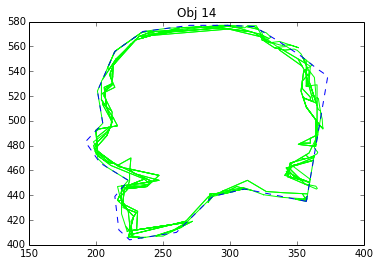

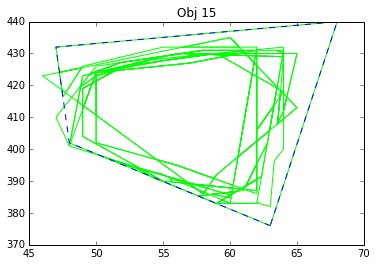

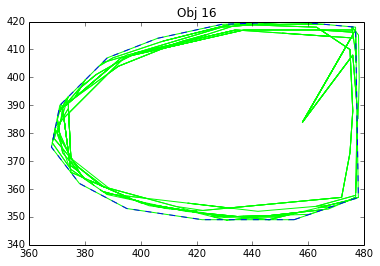

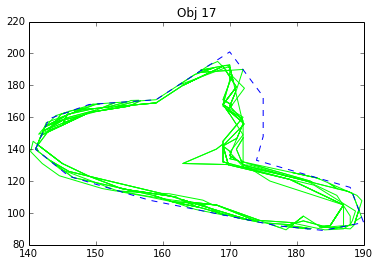

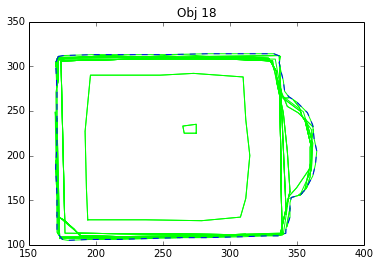

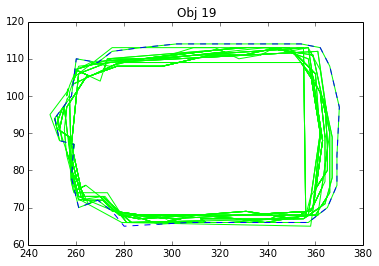

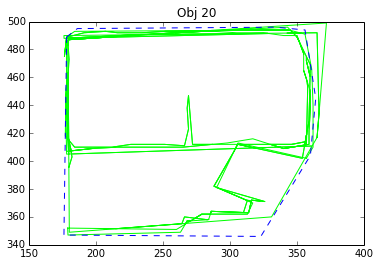

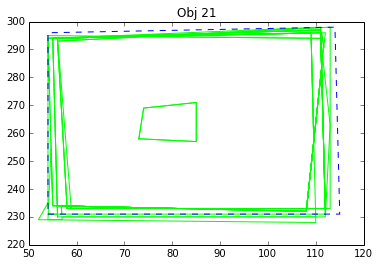

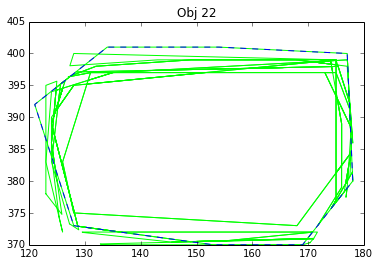

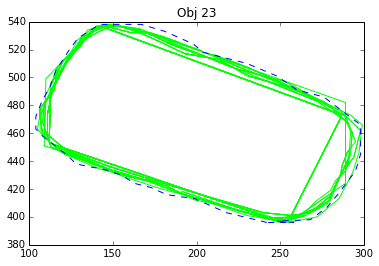

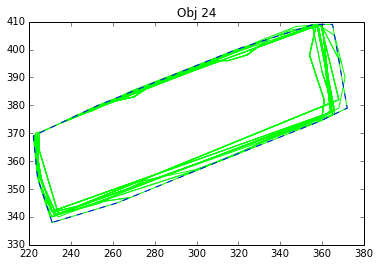

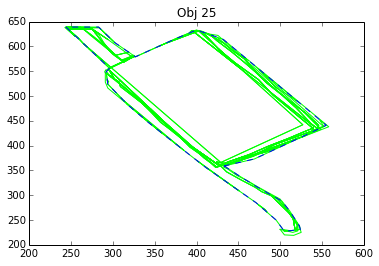

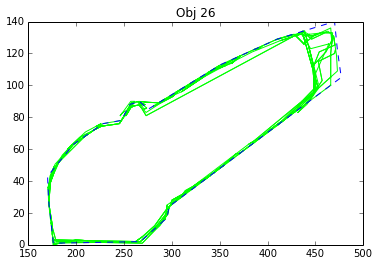

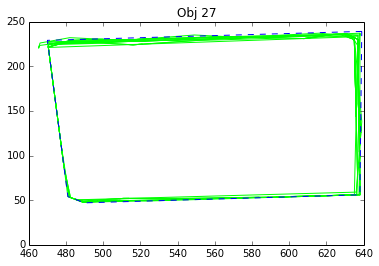

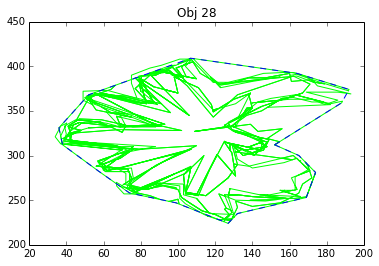

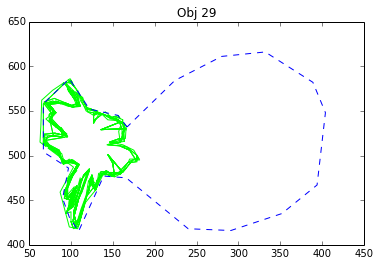

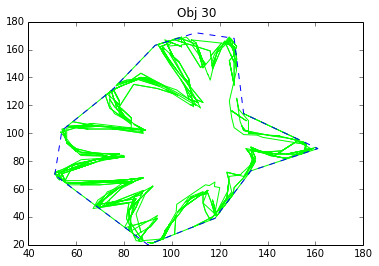

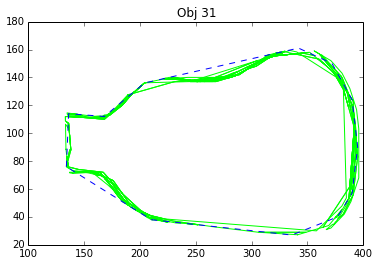

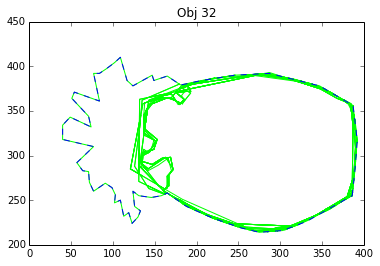

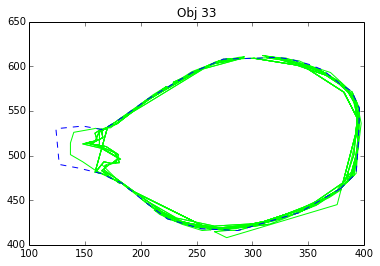

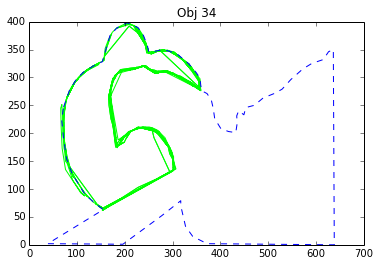

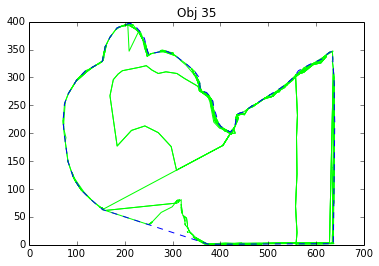

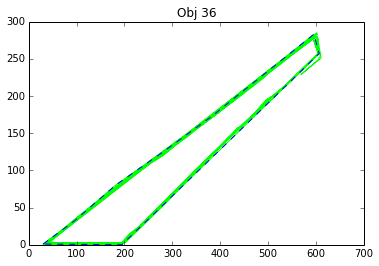

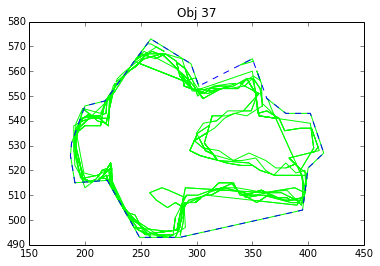

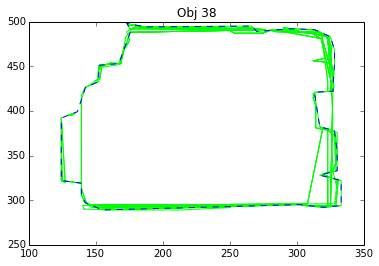

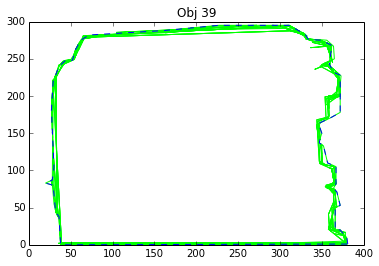

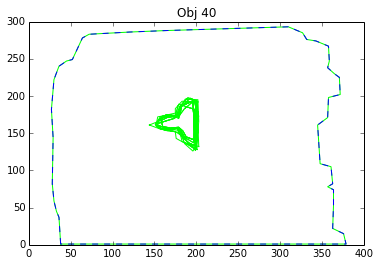

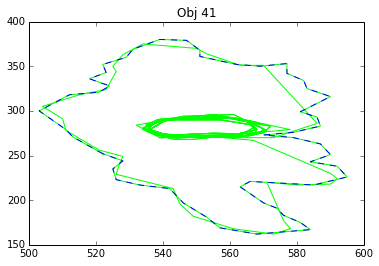

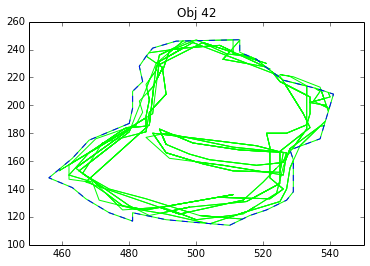

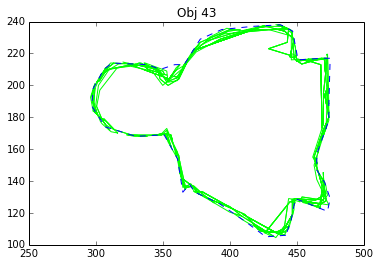

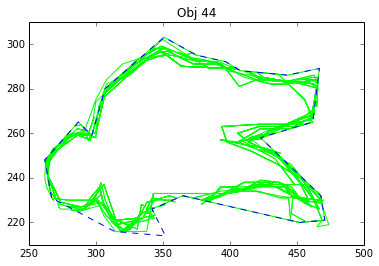

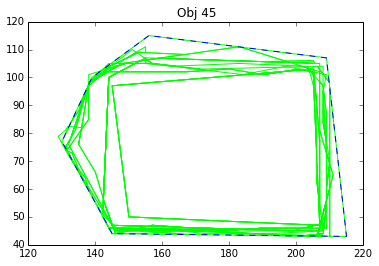

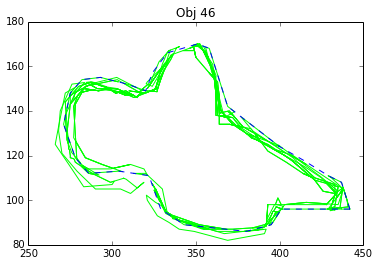

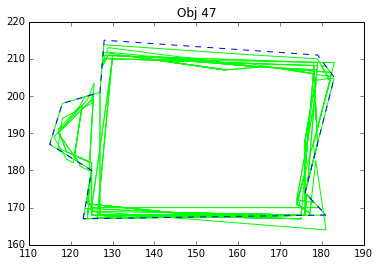

In [13]:
# objid = 1
sampleNworkers=10
p_lst =[]
r_lst =[]
for objid in tqdm(object_lst):
    os.chdir("../sample10/")
    tiles = pkl.load(open("tiles{}.pkl".format(objid),'r'))
    worker_lst= pkl.load(open("worker{}.pkl".format(objid),'r'))
    indicatorMat = pkl.load(open("indMat{}.pkl".format(objid),'r'))
    os.chdir("../"+DATA_DIR)
    p,r = PR_compare(tiles,worker_lst,indicatorMat,objid,sampleNworkers)    
    p_lst.append(p)
    r_lst.append(r)

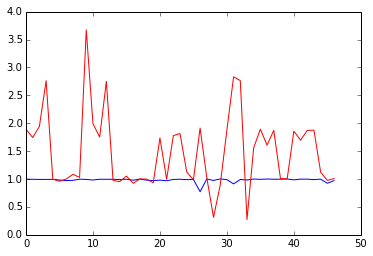

In [18]:
plt.plot(p_lst,color="blue",label="Precision")
plt.plot(r_lst,color="red",label="Recall")

In [17]:
print "Average precision" ,mean(p_lst)
print "Average recall" , mean(r_lst)

Average precision 0.982028504284
Average recall 1.49072844821


recall > 1 because intersection algorithm probably screwed up 

In [34]:
tiles = pkl.load(open("../tiles13.pkl",'r'))
worker = pkl.load(open("../worker13.pkl",'r'))
imat = pkl.load(open("../indMat13.pkl",'r'))

Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True


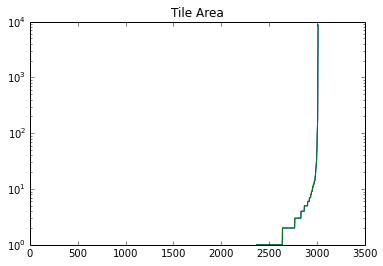

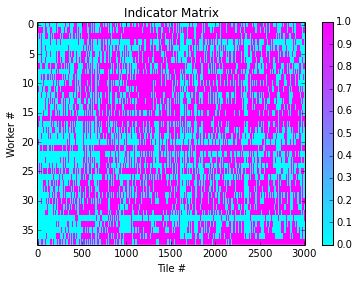

In [35]:
sanity_check(imat,PLOT=True)

In [36]:
len(tiles)

3013

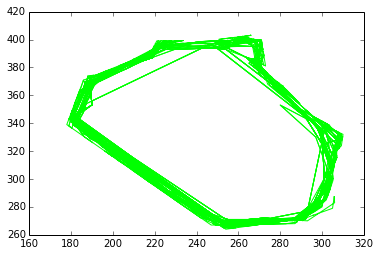

In [37]:
visualizeTiles(tiles)